# FRED® API

The FRED® API is a web service that allows developers to write programs and build applications that retrieve economic data from the FRED® and ALFRED® websites hosted by the Economic Research Division of the Federal Reserve Bank of St. Louis. Requests can be customized according to data source, release, category, series, and other preferences.

For documentation regarding Fred API, refer to the the following link ![](https://fred.stlouisfed.org/docs/api/fred/#API)

For exploring FRED data, refer to the following link ![](https://fred.stlouisfed.org/)

Importing the necessary libraries to perform analysis on FRED data

In [41]:

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


Connecting to the FRED® API using private API tokens. Any individual will be able to generate their private Keys after creating an account in the website.

The Private API keys are then stored in a json file which is then processed.

In [42]:

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred
from GetAPI import get_keys

secrets = get_keys('~/.secret/api-key.json')
fred_key = secrets['fred-api']
fred = Fred(api_key=fred_key)


Connceting to FRED through API

In order to bring amount code structure and reduce making API calls seperately a Class "FredPy" class has been utlized.

Classes provide a means of bundling data and functionality together. Creating a new class creates a new type of object, allowing new instances of that type to be made. Each class instance can have attributes attached to it for maintaining its state. Class instances can also have methods (defined by its class) for modifying its state.

In [58]:

cpiLessFoodEnergy = fred.get_series(
    series_id="CORESTICKM159SFRBATL", 
    start = '1970-01-01',
    end = '2022-03-01', 
    units = 'lin'
)

cpicore = fred.get_series(
    series_id="MEDCPIM158SFRBCLE", 
    start = '1983-01-01',
    end = '2022-03-01', 
    units = 'lin'
)

ppifreghttruck = fred.get_series(
    series_id="PCU484121484121", 
    start = '2000-01-01',
    end = '2022-03-01', 
    units = 'lin'
)


## CPI (excluding Food and Energy)

The Sticky Price Consumer Price Index (CPI) is calculated from a subset of goods and services included in the CPI that change price relatively infrequently.

Because these goods and services change price relatively infrequently, they are thought to incorporate expectations about future inflation to a greater degree than prices that change on a more frequent basis. One possible explanation for sticky prices could be the costs firms incur when changing price.

In the next analysis we explore how Consumer Price Index has changed over the years and try to understand the significance of the current scenario of high inflation.

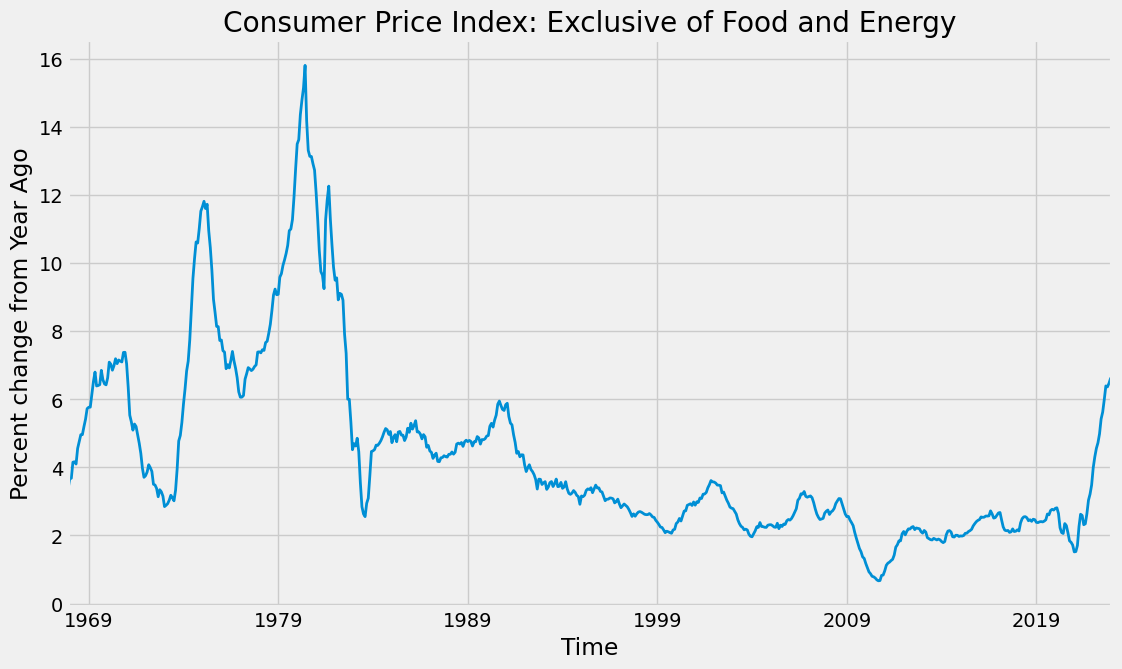

In [14]:

cpiLessFoodEnergy.plot(figsize=(12, 7), title='Consumer Price Index: Exclusive of Food and Energy', lw=2)

plt.ylabel('Percent change from Year Ago')
plt.xlabel('Time')
plt.show()


## Core CPI (Median Consumer Price Index)

CPI (excluding energy and food) does not present the complete picture of economical inflation. So lets explore to see the changes in the Core CPI.

Median Consumer Price Index (CPI) is a measure of core inflation calculated the Federal Reserve Bank of Cleveland and the Ohio State University. Median CPI was created as a different way to get a 'Core CPI' measure, or a better measure of underlying inflation trends. To calculate the Median CPI, the Cleveland Fed analyzes the median price change of the goods and services published by the BLS.

The median price change is the price change that’s right in the middle of the long list of all of the price changes. This series excludes 49.5% of the CPI components with the highest and lowest one-month price changes from each tail of the price-change distribution resulting in a Median CPI Inflation Estimate.

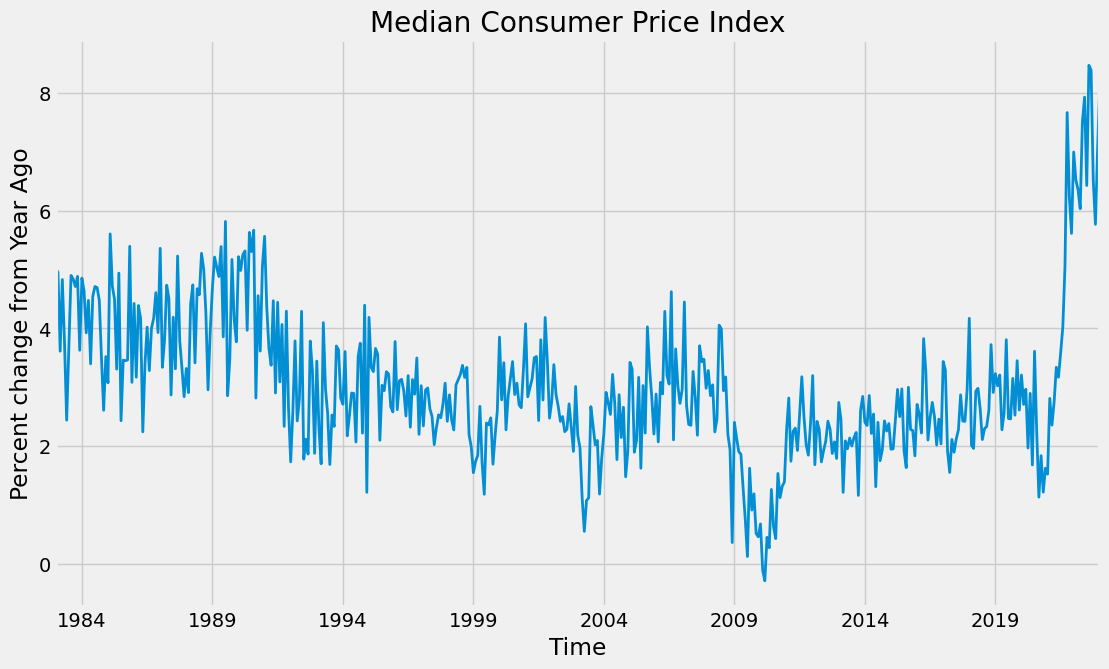

In [59]:
cpicore.plot(figsize=(12, 7), title='Median Consumer Price Index', lw=2)

plt.ylabel('Percent change from Year Ago')
plt.xlabel('Time')
plt.show()



## Moving Average Analysis

A moving analysis of the Median Consumer Price Index should give us a much clearer picture of the changes. Here, we are considering a moving average of 6 months.


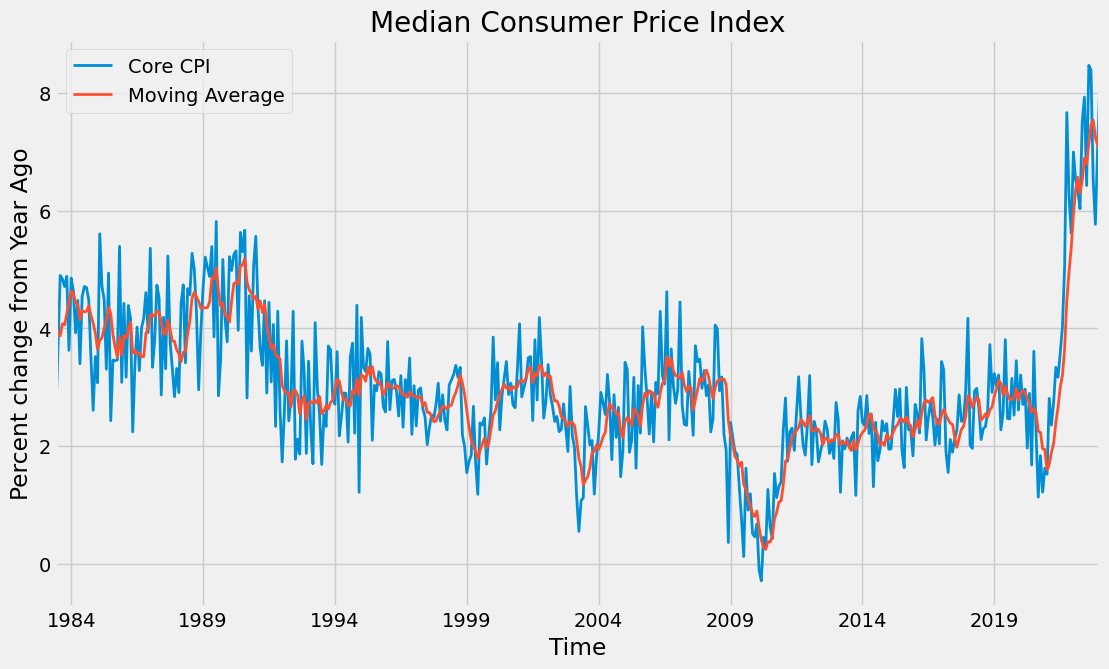

In [73]:
cpicore = cpicore.to_frame()
cpicore['MA'] = cpicore.rolling(window=6).mean()
cpicore.dropna(inplace=True)
cpicore.columns=['Core CPI', 'Moving Average']

cpicore.plot(figsize=(12, 7), title='Median Consumer Price Index', lw=2)
plt.title('Median Consumer Price Index')
plt.ylabel('Percent change from Year Ago')
plt.xlabel('Time')
plt.show()


## Producer Price Index by Industry: General Freight Trucking, Long-Distance Truckload

The Producer Price Index (PPI) program measures the average change over time in the selling prices received by domestic producers for their output. The prices included in the PPI are from the first commercial transaction for many products and some services.

It is usually believed that CPI indicator laggs behind PPI. The comparison is made by indexing the 2003 values as 100.


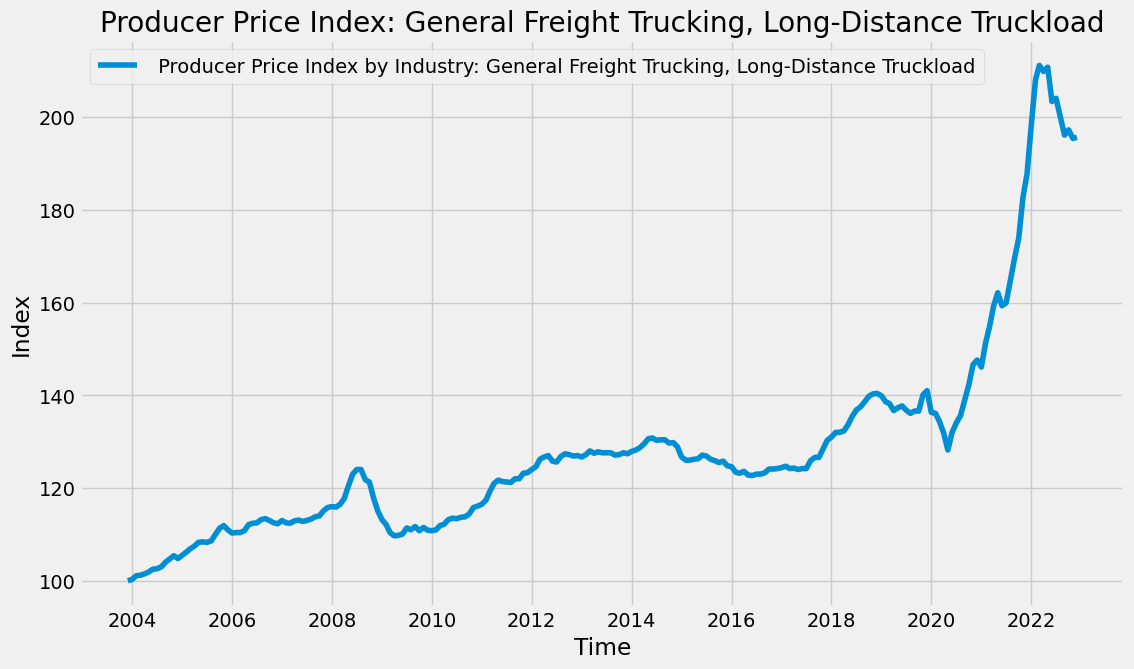

In [65]:

plt.figure(figsize = (12, 7))
plt.plot(ppifreghttruck, label=' Producer Price Index by Industry: General Freight Trucking, Long-Distance Truckload')

plt.title("Producer Price Index: General Freight Trucking, Long-Distance Truckload")
plt.ylabel('Index')
plt.xlabel('Time')
plt.legend()
plt.show()
